**Уровень 0**  

***Задание 1***  
Получить интуицию, на что влияют параметры распределений. Построить по 5 функций плотностей с разными параметрами для каждого распределения: нормальное, экспоненциальное, Стьюдента на одном графике.

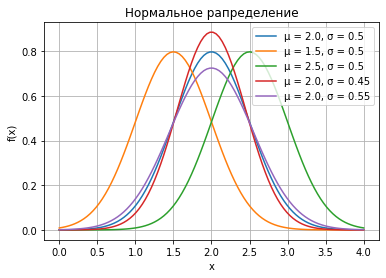

Пик плотности распределения находится над µ, и при изменении этого параметра смещается соответственно.
Изменение σ влияет на высоту и ширину купола: при увеличении значения σ купол становится более широким
и низким, и наоборот.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts


for vals in [(2.0, 0.5), (1.5, 0.5), (2.5, 0.5), (2.0, 0.45), (2.0, 0.55)]:
    norm_rv = sts.norm(loc=vals[0], scale=vals[1])
    x = np.linspace(0, 4, 100)
    y = norm_rv.pdf(x)
    plt.plot(x, y, label=f"µ = {vals[0]}, σ = {vals[1]}")

plt.title("Нормальное рапределение")
plt.ylabel("f(x)")
plt.xlabel("x")
plt.legend()
plt.grid()
plt.show()

print("""Пик плотности распределения находится над µ, и при изменении этого параметра смещается соответственно.
Изменение σ влияет на высоту и ширину купола: при увеличении значения σ купол становится более широким
и низким, и наоборот.""")

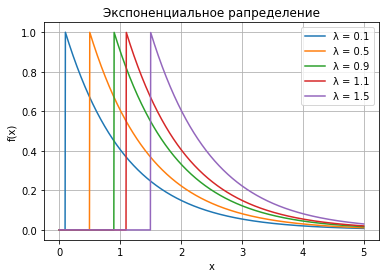

С увеличением λ график смещается вправо.


In [2]:
for lamda in [0.1, 0.5, 0.9, 1.1, 1.5]:
    expon_rv = sts.expon(lamda)
    x = np.linspace(0, 5, 1000)
    y = expon_rv.pdf(x)
    plt.plot(x, y, label=f"λ = {lamda}")

plt.title("Экспоненциальное рапределение")
plt.ylabel("f(x)")
plt.xlabel("x")
plt.legend()
plt.grid()
plt.show()

print("С увеличением λ график смещается вправо.")

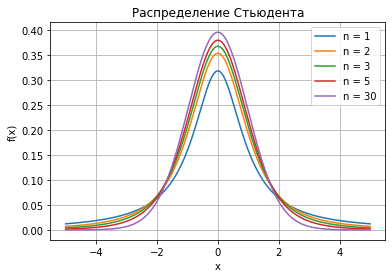

Изменение числа степеней свободы n влияет на высоту и ширину купола: при увеличении значения n купол становится
более узким и высоким, и наоборот.


In [3]:
for n in [1, 2, 3, 5, 30]:
    t_rv = sts.t(n)
    x = np.linspace(-5, 5, 1000)
    y = t_rv.pdf(x)
    plt.plot(x, y, label=f"n = {n}")

plt.title("Распределение Стьюдента")
plt.ylabel("f(x)")
plt.xlabel("x")
plt.legend()
plt.grid()
plt.show()

print("""Изменение числа степеней свободы n влияет на высоту и ширину купола: при увеличении значения n купол становится
более узким и высоким, и наоборот.""")

**Уровень 1**  

***Задание 2***  
Непрерывная случайная величина задана плотностью распределения:  
$$ f(\xi) = C, \xi \in [0;5];f(\xi) = 0, \xi \notin [0;5]$$  
Найдите C, математическое ожидание $\xi$ а также вероятность попадания $\xi$ в отрезок $[3.5;7]$, т.е. $P(3.5<\xi<7)$.


***Решение:***  
Описанное распределение непрерывной случайной величины является равномерным на отрезке, поэтому:  
$C = \frac{1}{b - a} = \frac{1}{5}$.  
Мат. ожидание $E(\xi)$ найдем как:  
$E(\xi) = \int_{a}^{b} \xi \cdot f(\xi) d\xi = \int_{a}^{b} \xi \cdot \frac{1}{b-a} d\xi = \frac{1}{b-a} \int_{a}^{b} \xi d\xi = \frac{1}{b-a} \frac{\xi^2}{2} \rvert_a^b = \frac{b^2 - a ^2}{2 \cdot (b - a)} = \frac{b + a}{2}$.  
$E(\xi) = \frac{5 + 0}{2}=2,5$.  
Вероятность попадания в интервал от с = 3,5 до d = 7:  
$P = \int_{c}^{d} f(\xi) d\xi = \int_{c}^{b} f(\xi) d\xi + \int_{b}^{d} f(\xi) d\xi = \int_{c}^{b} \frac{1}{b - a} d\xi + \int_{b}^{d} 0 d\xi = \frac{1}{b-a} \xi \rvert_c^b + 0 = \frac{b - c}{b - a}$.  
$P = \frac{5 - 3,5}{5 - 0} = 0,3$.  

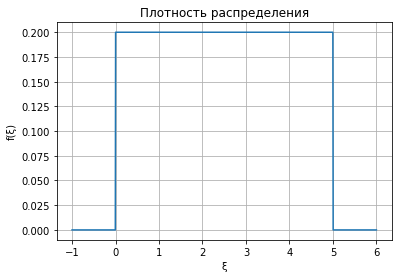

In [4]:
def f(x):
    a = 0
    b = 5
    if x >= a and x <= b:
        return 1 / (b - a)
    else:
        return 0

x = np.linspace(-1, 6, 1000)
y = [f(v) for v in x]

plt.plot(x, y)
plt.title("Плотность распределения")
plt.xlabel("ξ")
plt.ylabel("f(ξ)")
plt.grid()
plt.show()

***Задание 3***  
Известно, что светофор горит 54 секунды красным, 4 секунды жёлтым и 28 секунд зелёным. Посчитайте, какое количество информации несёт сообщение о цвете светофора в текущий момент. А что будет в случае 28, 28 и 28 секунд для каждого цвета?

In [5]:
import math

def info(r, y, g, eps=3):
    s = r + y + g
    pr = r / s
    py = y / s
    pg = g / s
    ir = -math.log2(pr)
    iy = -math.log2(py)
    ig = -math.log2(pg)
    return (round(ir, eps), round(iy, eps), round(ig, eps))

i1 = info(54, 4, 28)
i2 = info(28, 28, 28)
print(f"Вариант 1 (к - 54, ж - 4, з - 28)  : I1 = {i1[0]}, I2 = {i1[1]}, I3 = {i1[2]}.")
print(f"Вариант 2 (к - 28, ж - 28, з - 28) : I1 = {i2[0]}, I2 = {i2[1]}, I3 = {i2[2]}.")
print("""\nКак видим, в варианте 1 кол-во передаваемой информации разное. Причем, чем дольше горит цвет,
тем меньше передается информации и наоборот. Во 2-ом варианте кол-во передаваемой информации неизменно
от цвета при неизменности длительности горения.""")

Вариант 1 (к - 54, ж - 4, з - 28)  : I1 = 0.671, I2 = 4.426, I3 = 1.619.
Вариант 2 (к - 28, ж - 28, з - 28) : I1 = 1.585, I2 = 1.585, I3 = 1.585.

Как видим, в варианте 1 кол-во передаваемой информации разное. Причем, чем дольше горит цвет,
тем меньше передается информации и наоборот. Во 2-ом варианте кол-во передаваемой информации неизменно
от цвета при неизменности длительности горения.
